<a href="https://colab.research.google.com/github/mochimochi0108/KaggleDiaryLog/blob/main/PublicLB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

probspace
最適価格を予想するアルゴリズム(ダイナミックプライシング)
https://comp.probspace.com/competitions/bnb_price

rmsre


In [251]:
import pandas as pd
import numpy as np
import sklearn
!python3 --version
print("Pandas", pd.__version__)
print("Numpy", np.__version__)
print("Scikit learn", sklearn.__version__)
import matplotlib
print("Matplotlib", matplotlib.__version__)

import datetime
import locale

Python 3.7.13
Pandas 1.3.5
Numpy 1.21.5
Scikit learn 1.0.2
Matplotlib 3.2.2


In [252]:
#データの読み込みと前処理
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/probspace/PublicLB/input/train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/probspace/PublicLB/input/test_data.csv")
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/probspace/PublicLB/input/station_list.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/probspace/PublicLB/input/submission.csv")
data = pd.concat([train, test], sort=False)
print(train.shape,test.shape, sub.shape, station.shape,data.shape)

(9990, 13) (4996, 12) (4996, 2) (746, 3) (14986, 13)


In [253]:
display(train.head())
display(test.head())
display(station.head())
display(sub.head())
display(data.head())

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,y
0,1,KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...,242899459,Koto Ku,35.68185,139.80310,Entire home/apt,1,55,2020-04-25,2.21,173,12008
1,2,Downtown Tokyo Iriya next to Ueno,308879948,Taito Ku,35.72063,139.78536,Entire home/apt,6,72,2020-03-25,2.11,9,6667
2,3,"Japan Style,Private,Affordable,4min to Sta.",300877823,Katsushika Ku,35.74723,139.82349,Entire home/apt,1,18,2020-03-23,3.46,288,9923
3,4,4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi,236935461,Shibuya Ku,35.68456,139.68077,Entire home/apt,1,2,2020-04-02,1.76,87,8109
4,5,LICENSED SHINJUKU HOUSE: Heart of the action!,243408889,Shinjuku Ku,35.69840,139.70467,Entire home/apt,1,86,2020-01-30,2.00,156,100390


,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,1,"5-minute walk from Akasaka Sta, Superior double",184730720,Minato Ku,35.67131,139.73285,Private room,1,0,NaN,NaN,183
1,2,7 min Sta.-Center of IKEBUKURO Cozy Room#503,20993205,Toshima Ku,35.73014,139.71739,Entire home/apt,2,21,2020-04-16,1.94,337
2,3,Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min,322521715,Setagaya Ku,35.66193,139.66540,Entire home/apt,1,14,2020-02-12,0.82,240
3,4,Komagome Station 2 minutes on foot,234477095,Toshima Ku,35.73603,139.74794,Entire home/apt,1,16,2020-02-17,1.19,0
4,5,"Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara",145453833,Taito Ku,35.72126,139.78320,Entire home/apt,30,2,2019-07-21,0.19,164


,station_name,longitude,latitude
0,白丸,139.114861,35.811735
1,古里,139.152102,35.816247
2,川井,139.164290,35.813697
3,御嶽,139.182589,35.801468
4,沢井,139.193324,35.805940


,id,y
0,1,49108
1,2,12644
2,3,34576
3,4,87371
4,5,287


,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,y
0,1,KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...,242899459,Koto Ku,35.68185,139.80310,Entire home/apt,1,55,2020-04-25,2.21,173,12008.0
1,2,Downtown Tokyo Iriya next to Ueno,308879948,Taito Ku,35.72063,139.78536,Entire home/apt,6,72,2020-03-25,2.11,9,6667.0
2,3,"Japan Style,Private,Affordable,4min to Sta.",300877823,Katsushika Ku,35.74723,139.82349,Entire home/apt,1,18,2020-03-23,3.46,288,9923.0
3,4,4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi,236935461,Shibuya Ku,35.68456,139.68077,Entire home/apt,1,2,2020-04-02,1.76,87,8109.0
4,5,LICENSED SHINJUKU HOUSE: Heart of the action!,243408889,Shinjuku Ku,35.69840,139.70467,Entire home/apt,1,86,2020-01-30,2.00,156,100390.0


# 欠損値確認  
last_review
reviews_per_month
に同数の欠損あり
At　this time. reviews is 0.

In [254]:
display(data.isnull().sum())
# display((data['last_review'].isnull()).sum())
# display((data['reviews_per_month'].isnull()).sum())
# display((data['number_of_reviews'] == 0).sum())
##number_of_reviews が ０の時のlast_review, reviews_per_month が同数か確認 > 同数（train,test共に）
# display(train[train['number_of_reviews'] == 0].isnull().sum())
# display(test[test['number_of_reviews'] == 0].isnull().sum())
# display(data[data['number_of_reviews'] == 0].isnull().sum())
data['last_review'] = data['last_review'].fillna(method='ffill')
data['reviews_per_month'] = data['reviews_per_month'].fillna(method='ffill')
display(data.isnull().sum())


id                      0
name                    0
host_id                 0
neighbourhood           0
latitude                0
longitude               0
room_type               0
minimum_nights          0
number_of_reviews       0
last_review          2531
reviews_per_month    2531
availability_365        0
y                    4996
dtype: int64

id                      0
name                    0
host_id                 0
neighbourhood           0
latitude                0
longitude               0
room_type               0
minimum_nights          0
number_of_reviews       0
last_review             0
reviews_per_month       0
availability_365        0
y                    4996
dtype: int64

In [255]:
data.dtypes        

id                     int64
name                  object
host_id                int64
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
minimum_nights         int64
number_of_reviews      int64
last_review           object
reviews_per_month    float64
availability_365       int64
y                    float64
dtype: object

In [256]:
### EDA ###
#① Pythonのバージョン確認、モジュールのimport、データの読み込み
# pd.read_csv()
# train_data.head()
# train_data.tail()

#② 簡単にデータの状態を確認する（行数列数カウント・データの選択的表示・重複の有無など）
# train_data.shape
# train_data.index
# train_data.columns
# data.dtypes
# train_data.loc[0:2,'name':'latitude']
# train_data.iloc[0:2,2:4]
# train_data.query('number_of_reviews >= 55 and minimum_nights == 1')
# train_data['neighbourhood'].unique()
# train_data['neighbourhood'].value_counts() #ユニークな要素値と出現回数

# train_data['number_of_reviews'].drop_duplicates()
# train_data.describe()

# ③ データの整形（データ型変更、列名変更、並び替えなど）
# train_data.set_index('minimum_nights').sort_index()
# train_data.rename(columns={'name':'A', 'host_id':'B', 'neighbourhood':'C'})
# train_data.sort_values(by = 'longitude')
# train_data.sort_values(by = ['longitude', 'availability_365'])
# train_data['last_review'] = pd.to_datetime(train_data['last_review'])

# train_data.sort_index()
# train_data.resample()
# train_data.apply()
# train_data.cut()

# data.isnull().sum(axis=0)　## 欠損値確認
# data[data['number_of_reviews'] == 0].isnull().sum()

# name                         object　　　　削除
# host_id                       int64
# neighbourhood                object　　　　修正済み
# latitude                    float64
# longitude                   float64
# room_type                    object  修正済み
# minimum_nights                int64
# number_of_reviews             int64
# last_review          datetime64[ns]   修正済み
# reviews_per_month           float64
# availability_365              int64

#曜日を要素に入れたい　　が方法がわからない > dt.をつけるとできる
# pd.to_datetime(data['last_review'])　＃datetimeに変更
# data['last_review'].dt.weekday ＃ 曜日を数値で抜きだし
# data['last_review'].dt.year ＃ 西暦を抜きだし
# data['last_review'].dt.month ＃ 月を抜きだし


1.name

In [257]:
data['name'].value_counts()
#施設名称を削除
del data['name']

2.host_id

In [258]:
data['host_id'].value_counts()

188123234    98
303026256    74
16406686     71
165921683    66
207693509    54
             ..
17736560      1
287790951     1
10705201      1
302205110     1
278332086     1
Name: host_id, Length: 3579, dtype: int64

3.neighbourhood

In [259]:
#neighbourhood所在地を数値表記に変換
Station_mapping ={
'Shinjuku Ku':1,
'Taito Ku':2,
'Toshima Ku':3,
'Sumida Ku':4,
'Shibuya Ku':5,
'Chuo Ku':6,
'Minato Ku':7,
'Ota Ku':8,
'Nakano Ku':9,
'Arakawa Ku':10,
'Katsushika Ku':11,
'Setagaya Ku':12,
'Kita Ku':13,
'Itabashi Ku':14,
'Suginami Ku':15,
'Koto Ku':16,
'Chiyoda Ku':17,
'Edogawa Ku':18,
'Shinagawa Ku':19,
'Adachi Ku':20,
'Bunkyo Ku':21,
'Nerima Ku':22,
'Meguro Ku':23
}
data['neighbourhood'] = data['neighbourhood'].map(Station_mapping)
data['neighbourhood'].value_counts()

1     2803
2     2126
3     1629
4     1319
5     1095
6      610
7      578
8      527
9      452
11     433
10     406
12     381
13     366
14     339
15     334
18     277
19     263
16     242
17     238
20     194
21     191
22      92
23      91
Name: neighbourhood, dtype: int64

4.latitude

In [260]:
data['latitude'].value_counts()

35.60432    26
35.69758    26
35.69816    25
35.70027    21
35.69307    21
            ..
35.75710     1
35.67059     1
35.73915     1
35.61365     1
35.68555     1
Name: latitude, Length: 7979, dtype: int64

5.longitude

In [261]:
data['longitude'].value_counts()

139.70352    30
139.73279    28
139.70587    25
139.69406    24
139.81075    21
             ..
139.68995     1
139.72687     1
139.81609     1
139.79040     1
139.77741     1
Name: longitude, Length: 9208, dtype: int64

6.room_type

In [262]:
display(data['room_type'].value_counts())
#部屋タイプを数値表記に変換
Roomtype_mapping ={
'Entire home/apt':1,
'Private room':2,
'Hotel room':3,
'Shared room':4
}
data['room_type'] = data['room_type'].map(Roomtype_mapping)
display(data['room_type'].value_counts())


Entire home/apt    10377
Private room        3170
Hotel room           739
Shared room          700
Name: room_type, dtype: int64

1    10377
2     3170
3      739
4      700
Name: room_type, dtype: int64

7.minimum_nights

In [263]:
data['minimum_nights'].value_counts()

1      9019
2      3832
3       789
30      643
7       113
4       105
5       104
6        70
23       63
28       60
14       34
15       31
31       25
12       15
20       14
29       14
10       14
13        7
25        5
21        4
8         3
90        3
32        3
365       3
9         2
60        2
180       2
16        1
360       1
24        1
35        1
33        1
100       1
99        1
Name: minimum_nights, dtype: int64

8.number_of_reviews

In [264]:
data['number_of_reviews'].value_counts()

0      2531
1      1012
2       706
3       604
4       467
       ... 
238       1
174       1
189       1
259       1
206       1
Name: number_of_reviews, Length: 277, dtype: int64

9.last_review

In [265]:
data['last_review'].value_counts()
#last_reviewがobjectなのでdatetimeに変換
data['last_review'] = pd.to_datetime(data['last_review'])
data['year'] = data['last_review'].dt.year
data['month'] = data['last_review'].dt.month
data['day'] = data['last_review'].dt.weekday
del data['last_review']

10.reviews_per_month

In [266]:
data['reviews_per_month'].value_counts()

1.00    174
0.25     90
0.32     87
0.33     79
0.27     79
       ... 
6.66      1
6.40      1
7.68      1
4.95      1
6.42      1
Name: reviews_per_month, Length: 629, dtype: int64

11.availability_365

In [267]:
data['availability_365'].value_counts()

0      2097
180     354
365     338
90      266
179     253
       ... 
200       6
206       5
202       4
284       4
190       3
Name: availability_365, Length: 366, dtype: int64

12.y
１日あたりの宿泊料  
１万円以下にピーク、９万円にも山あり

9931.0     10
9930.0      7
9956.0      7
6008.0      7
9988.0      7
           ..
12352.0     1
8781.0      1
6840.0      1
25079.0     1
45041.0     1
Name: y, Length: 7520, dtype: int64

(array([9.357e+03, 4.600e+02, 4.200e+01, 2.400e+01, 6.000e+00, 5.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.500e+01,
        4.000e+00, 3.000e+00]),
 array([9.210000e+02, 5.088010e+04, 1.008392e+05, 1.507983e+05,
        2.007574e+05, 2.507165e+05, 3.006756e+05, 3.506347e+05,
        4.005938e+05, 4.505529e+05, 5.005120e+05, 5.504711e+05,
        6.004302e+05, 6.503893e+05, 7.003484e+05, 7.503075e+05,
        8.002666e+05, 8.502257e+05, 9.001848e+05, 9.501439e+05,
        1.000103e+06]),
 <a list of 20 Patch objects>)

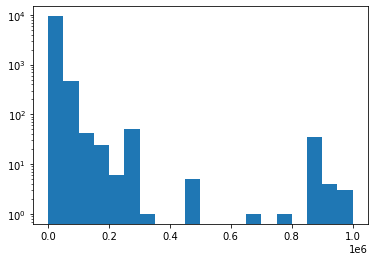

In [268]:
display(data['y'].value_counts())

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(train['y'], log=True, bins=20)

In [280]:
train =data[:len(train)]
test = data[len(train):]
y_train = train['y'] /1000
X_train =train.drop('y', axis=1)
X_test =test.drop('y', axis =1)

In [281]:
X_train.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,year,month,day
0,1,242899459,16,35.68185,139.80310,1,1,55,2.21,173,2020,4,5
1,2,308879948,2,35.72063,139.78536,1,6,72,2.11,9,2020,3,2
2,3,300877823,11,35.74723,139.82349,1,1,18,3.46,288,2020,3,0
3,4,236935461,5,35.68456,139.68077,1,1,2,1.76,87,2020,4,3
4,5,243408889,1,35.69840,139.70467,1,1,86,2.00,156,2020,1,3


In [282]:
y_train.head()

0     12.008
1      6.667
2      9.923
3      8.109
4    100.390
Name: y, dtype: float64

In [283]:
X_train.isnull().sum()

id                   0
host_id              0
neighbourhood        0
latitude             0
longitude            0
room_type            0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
year                 0
month                0
day                  0
dtype: int64

In [284]:
#scikit-learnライブラリをimport
import sklearn
from sklearn.ensemble import RandomForestRegressor as RFR

#回帰モデルのインスタンス化
model = RFR()

#予測モデルの作成
result = model.fit(X_train, y_train)

In [285]:
model.score(X_train, y_train)

0.9318746929588928

In [275]:
# accuracyの出力
from sklearn.metrics import mean_squared_log_error
y_true = y_train
y_pred = model.predict(X_train)
print(np.sqrt(mean_squared_log_error(y_true, y_pred)))

0.36149970412791094


In [276]:
#テスト結果の出力
test_predicted = model.predict(X_test)
submit_df = pd.DataFrame({'y': test_predicted})
submit_df.index.name = 'id'
submit_df.to_csv('/content/drive/MyDrive/Colab Notebooks/probspace/PublicLB/output/submission2.csv')